# Student Score Prediction

In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sqlite3
import requests

from utils import *
from config import *

# set pandas column display to max
pd.set_option('display.max_columns', None)

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# set your parameters
SEED_VALUE = 2023
URL_DATA = 'https://techassessment.blob.core.windows.net/aiap-preparatory-bootcamp/score.db'
PATH_DATA = 'src/data'
FN_DATA = 'score.db'
NAME_DB = 'score'

Download the Data Source

In [5]:
# Download data
# Ensure the target folder exists, create it if not
os.makedirs(PATH_DATA, exist_ok=True)

# Send an HTTP GET request to the URL
response = requests.get(URL_DATA)

if response.status_code == 200:
    # If the request is successful, save the content to a file
    file_path = os.path.join(PATH_DATA, FN_DATA)

    with open(file_path, 'wb') as file:
        file.write(response.content)

    print(f"File saved to: {file_path}")
    
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")

File saved to: src/data\score.db


In [6]:
# extract data
connection = sqlite3.connect(os.path.join(PATH_DATA, FN_DATA))
cursor = connection.cursor()

query = f'SELECT * FROM {NAME_DB}'

# retrieve the data from the data source
cursor.execute(query)
raw_data = cursor.fetchall()

# retrieve the data source columns names
raw_data_column_name = list(map(lambda x: x[0], cursor.description))

raw_data = pd.DataFrame(raw_data)
raw_data.columns = raw_data_column_name

raw_data

,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
0,0,0,Yes,Sports,Visual,ACN2BE,Female,No,69.0,14.0,2.0,16.0,10.0,91.0,22:00,6:00,private transport,yellow
1,1,2,No,Sports,Auditory,FGXIIZ,Female,No,47.0,4.0,19.0,16.0,7.0,94.0,22:30,6:30,private transport,green
2,2,0,Yes,None,Visual,B9AI9F,Male,No,85.0,14.0,2.0,15.0,8.0,92.0,22:30,6:30,private transport,white
3,3,1,No,Clubs,Auditory,FEVM1T,Female,Yes,64.0,2.0,20.0,15.0,18.0,NaN,21:00,5:00,public transport,yellow
4,4,0,No,Sports,Auditory,AXZN2E,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,21:30,5:30,public transport,yellow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15895,15895,1,No,Clubs,Visual,XPECN2,Female,No,56.0,12.0,14.0,16.0,9.0,96.0,22:00,6:00,private transport,black
15896,15896,1,Yes,None,Auditory,7AMC7S,Male,Yes,85.0,17.0,5.0,16.0,7.0,91.0,22:30,6:30,private transport,white
15897,15897,1,Yes,Sports,Auditory,XKZ6VN,Female,Yes,76.0,7.0,10.0,15.0,7.0,93.0,23:00,7:00,walk,red
15898,15898,1,No,Clubs,Visual,2OU4UQ,Male,Yes,45.0,18.0,12.0,16.0,3.0,94.0,23:00,7:00,walk,yellow


## Exploratory Data Analysis (EDA)

In [7]:
df = raw_data.copy(deep=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15900 entries, 0 to 15899
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               15900 non-null  int64  
 1   number_of_siblings  15900 non-null  int64  
 2   direct_admission    15900 non-null  object 
 3   CCA                 15900 non-null  object 
 4   learning_style      15900 non-null  object 
 5   student_id          15900 non-null  object 
 6   gender              15900 non-null  object 
 7   tuition             15900 non-null  object 
 8   final_test          15405 non-null  float64
 9   n_male              15900 non-null  float64
 10  n_female            15900 non-null  float64
 11  age                 15900 non-null  float64
 12  hours_per_week      15900 non-null  float64
 13  attendance_rate     15122 non-null  float64
 14  sleep_time          15900 non-null  object 
 15  wake_time           15900 non-null  object 
 16  mode

There are around 495 null value on final_test and 778 null value on attendance_rate.

In [9]:
df.isna().sum()

index                   0
number_of_siblings      0
direct_admission        0
CCA                     0
learning_style          0
student_id              0
gender                  0
tuition                 0
final_test            495
n_male                  0
n_female                0
age                     0
hours_per_week          0
attendance_rate       778
sleep_time              0
wake_time               0
mode_of_transport       0
bag_color               0
dtype: int64

In [10]:
print('Null value percentage on final_test {:.2f}%'.format(df['final_test'].isna().sum()/df['student_id'].nunique()*100))
print('Null value percentage on attendance_rate {:.2f}%'.format(df['attendance_rate'].isna().sum()/df['student_id'].nunique()*100))

Null value percentage on final_test 3.30%
Null value percentage on attendance_rate 5.19%


Since majority secondary students attend class in Singapore and don't skip classes. Let's impute the attendance rate to average attendance_rate.

As final_test is the feature of our interest, let's not impute the values and drop rows with missing final test as it only contributes to 3%.

In [11]:
df['attendance_rate'].fillna(df['attendance_rate'].mean(), inplace=True)
df = df[~df['final_test'].isna()]

In [12]:
df.describe()

,index,number_of_siblings,final_test,n_male,n_female,age,hours_per_week,attendance_rate
count,15405.000000,15405.000000,15405.000000,15405.000000,15405.000000,15405.000000,15405.000000,15405.000000
mean,7942.309185,0.886985,67.165401,13.878935,8.903083,15.214346,10.312301,93.265991
std,4589.766267,0.752139,13.977879,6.547230,6.661095,1.757209,4.463029,7.787777
min,0.000000,0.000000,32.000000,0.000000,0.000000,-5.000000,0.000000,40.000000
25%,3977.000000,0.000000,56.000000,10.000000,4.000000,15.000000,7.000000,92.000000
50%,7934.000000,1.000000,68.000000,14.000000,8.000000,15.000000,9.000000,94.000000
75%,11909.000000,1.000000,78.000000,18.000000,13.000000,16.000000,14.000000,97.000000
max,15899.000000,2.000000,100.000000,31.000000,31.000000,16.000000,20.000000,100.000000


There are -5 for age which does not make sense. Let's check the age distribution.

<AxesSubplot: >

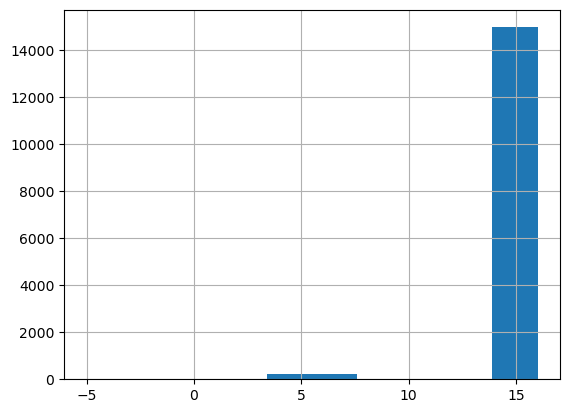

In [13]:
df['age'].hist()

Majority student has age 15 and few students with age between 4 and 6. Students should have min age 15 year old to be able to sit for o'level as per sg government requirement.

Filter the student age to have at least 15.

In [14]:
df = df[df['age']>=15]

There are multiple different inputs for the CCA. Let's standardise it.

In [15]:
df['CCA'].value_counts()

Clubs     3700
Sports    3639
None      3601
Arts      3559
CLUBS      135
NONE       119
ARTS       116
SPORTS     100
Name: CCA, dtype: int64

In [16]:
df['CCA'] = df['CCA'].str.upper()

The student CCA variable are quite well distributed with most students join CLUBS follows by SPORTS and NONE. ART is the least popular CCA.

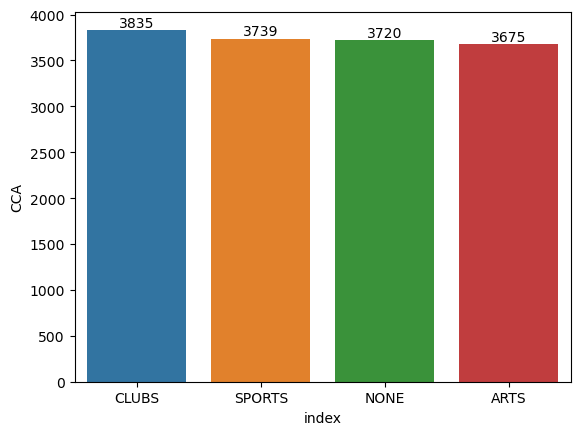

In [19]:
cca_variance = df['CCA'].value_counts().reset_index()

ax = sns.barplot(cca_variance, x='index', y='CCA')

for i in ax.containers:
    ax.bar_label(i,)

plt.savefig(r'plot/cca_dist.jpeg')

Majority students have 1 sibling and follows by 0 sibling.

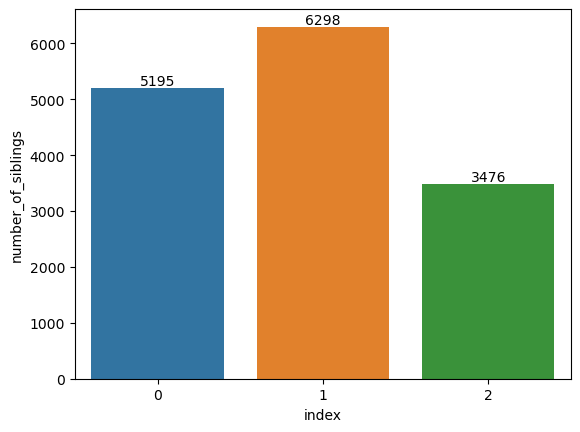

In [20]:
siblings_no = df['number_of_siblings'].value_counts().reset_index()

ax = sns.barplot(siblings_no, x='index', y='number_of_siblings')

for i in ax.containers:
    ax.bar_label(i,)

plt.savefig(r'plot/siblings_dist.jpeg')

The student final_test score follows normal distribution. Majority students have final_test around 60-70.

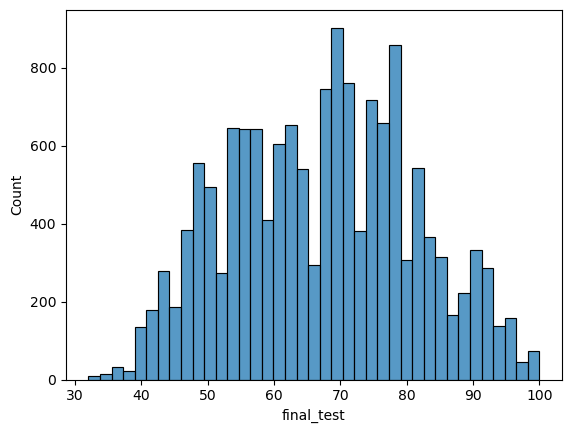

In [21]:
sns.histplot(df['final_test'])

plt.savefig(r'plot/score_dist.jpeg')

Most of the students are not direct admission.

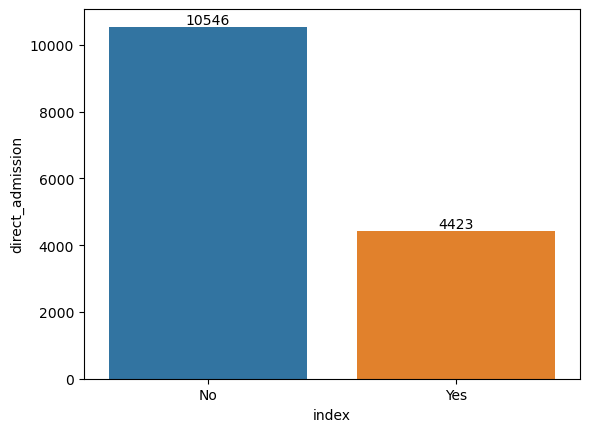

In [22]:
admission_breakdown = df['direct_admission'].value_counts().reset_index()

ax = sns.barplot(admission_breakdown, x='index', y='direct_admission')

for i in ax.containers:
    ax.bar_label(i,)

plt.savefig(r'plot/direct_admission_dist.jpeg')

Most students learn from audio rather than visual.

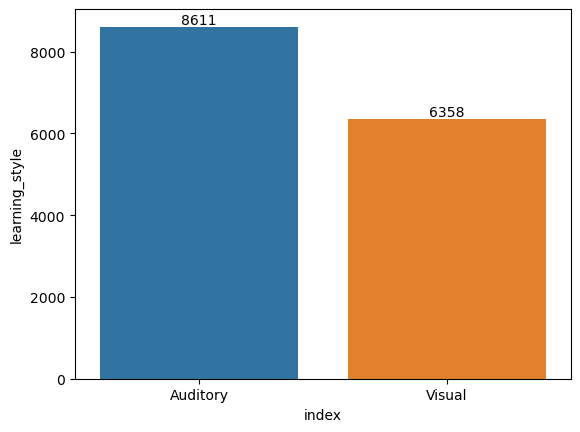

In [23]:
learning_style_breakdown = df['learning_style'].value_counts().reset_index()

ax = sns.barplot(learning_style_breakdown, x='index', y='learning_style')

for i in ax.containers:
    ax.bar_label(i,)

plt.savefig(r'plot/learning_style_dist.jpeg')

There are multiple different inputs for the CCA. Let's standardise it.

In [24]:
df['tuition'].value_counts()

Yes    8178
No     6249
Y       302
N       240
Name: tuition, dtype: int64

In [25]:
df['tuition'] = np.where(df['tuition']=='Y', 'Yes', df['tuition'])
df['tuition'] = np.where(df['tuition']=='N', 'No', df['tuition'])

Most students have tuitions.

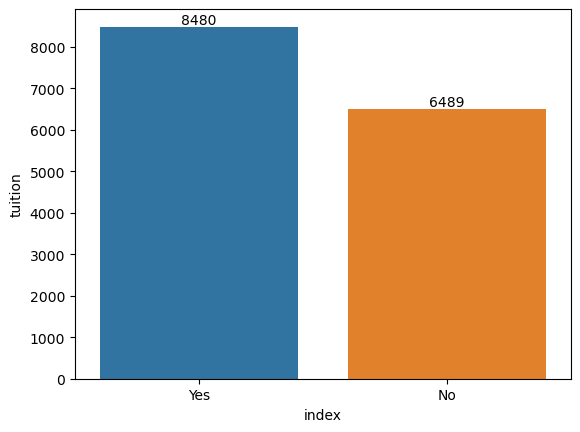

In [27]:
have_tuition = df['tuition'].value_counts().reset_index()

ax = sns.barplot(have_tuition, x='index', y='tuition')

for i in ax.containers:
    ax.bar_label(i,)

plt.savefig(r'plot/have_tuition_dist.jpeg')

n_male distribution is considered normal with majority students have around 15 male friends.

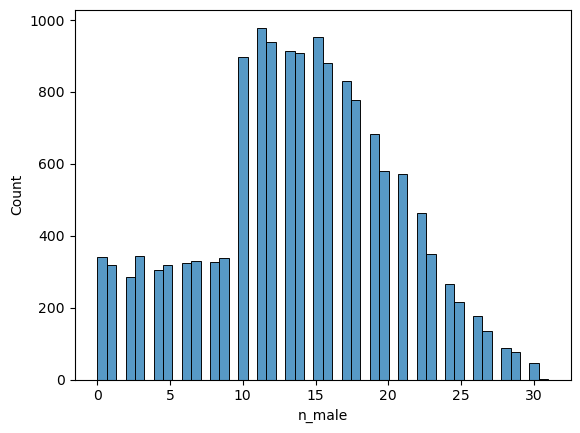

In [28]:
sns.histplot(df['n_male'])

plt.savefig(r'plot/male_friends_dist.jpeg')

n_female distribution is right skewed with majority students have less 10 female friends.

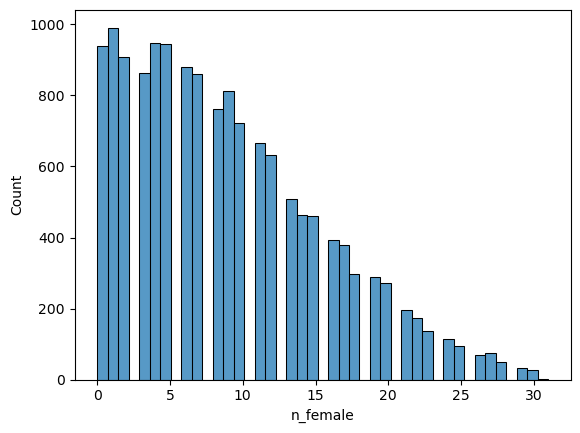

In [29]:
sns.histplot(df['n_female'])

plt.savefig(r'plot/female_friends_dist.jpeg')

The gender equality is strong in this data. Both genders have equal distribution.

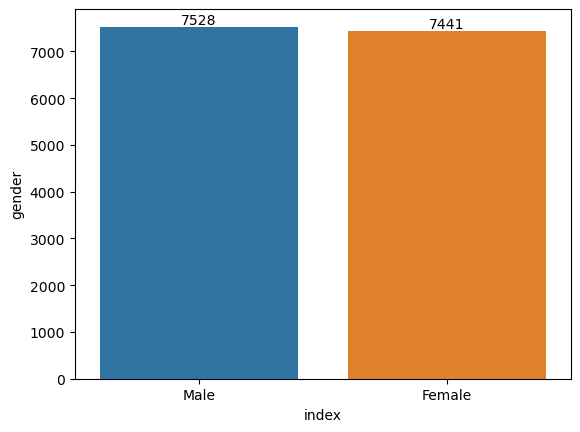

In [30]:
gender_breakdown = df['gender'].value_counts().reset_index()

ax = sns.barplot(gender_breakdown, x='index', y='gender')

for i in ax.containers:
    ax.bar_label(i,)

plt.savefig(r'plot/gender_dist.jpeg')

Most students study for 7-9 hours per week.

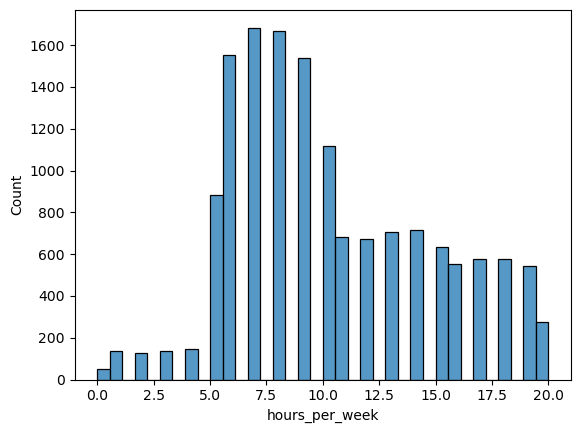

In [31]:
sns.histplot(df['hours_per_week'])

plt.savefig(r'plot/study_hours_dist.jpeg')

Most students sleep at 23:00 hours.

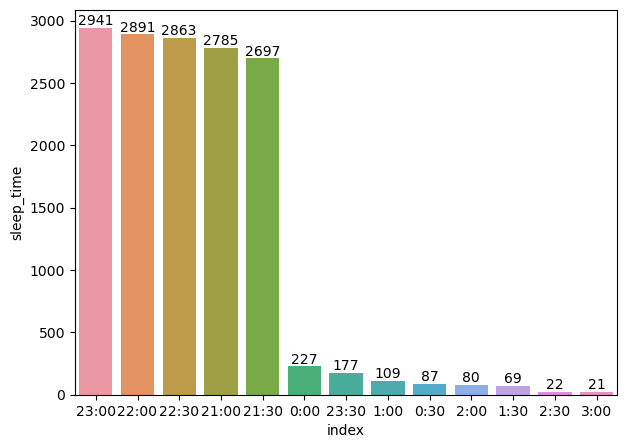

In [32]:
sleeptime_plot = df['sleep_time'].value_counts().reset_index()

plt.figure(figsize=(7, 5))
ax = sns.barplot(sleeptime_plot, x='index', y='sleep_time')

for i in ax.containers:
    ax.bar_label(i,)

plt.savefig(r'plot/sleep_hours_dist.jpeg')

and wake up at 05:00 hours.

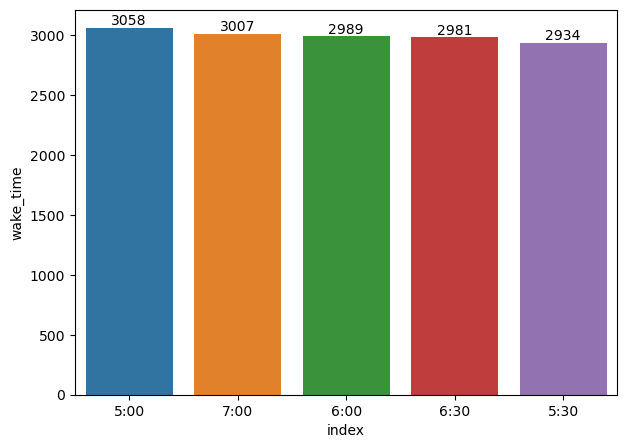

In [33]:
waketime_plot = df['wake_time'].value_counts().reset_index()

plt.figure(figsize=(7, 5))
ax = sns.barplot(waketime_plot, x='index', y='wake_time')

for i in ax.containers:
    ax.bar_label(i,)

plt.savefig(r'plot/waketime_dist.jpeg')

Knowing sleeping time and wake time are not so meaningful. Instead, no of sleep is more meaningful as more sleeps equal more energy to focus on class and study.

Let's derive no of sleep hours. Drop sleep time and wake time as these columns are no longer used.

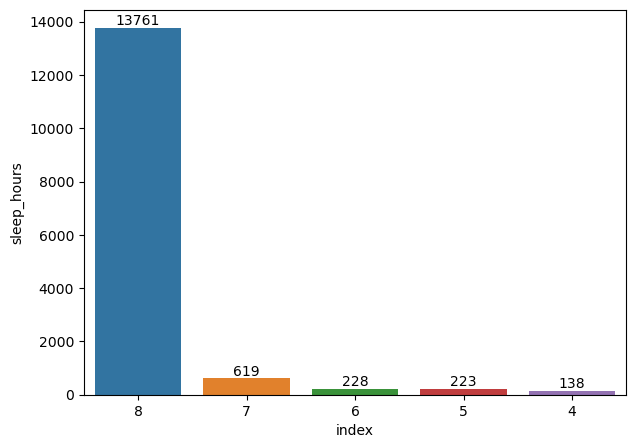

In [34]:
df['sleep_hours'] = np.where(pd.to_datetime(df['sleep_time']).dt.hour >= 12, 
                             (pd.to_datetime(df['wake_time']).dt.hour + 12) - (pd.to_datetime(df['sleep_time']).dt.hour - 12),
                             pd.to_datetime(df['wake_time']).dt.hour - pd.to_datetime(df['sleep_time']).dt.hour
                            )

df.drop(['wake_time', 'sleep_time'], axis=1, inplace=True)

sleep_hours_plot = df['sleep_hours'].value_counts().reset_index()
sleep_hours_plot['index'] = sleep_hours_plot['index'].astype('str')

plt.figure(figsize=(7, 5))
ax = sns.barplot(sleep_hours_plot, x='index', y='sleep_hours')

for i in ax.containers:
    ax.bar_label(i,)

plt.savefig(r'plot/sleep_hours_dist.jpeg')

Most students achieved attendance rate between 90-100.

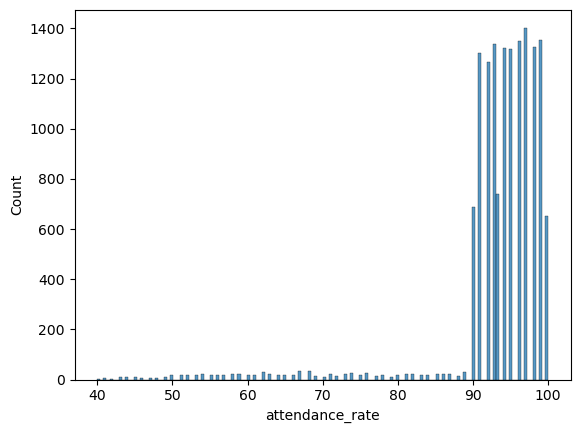

In [35]:
sns.histplot(df['attendance_rate'])

plt.savefig(r'plot/attendance_rate_dist.jpeg')

Most students have bag color yellow follows by black.
The data also well distributed.

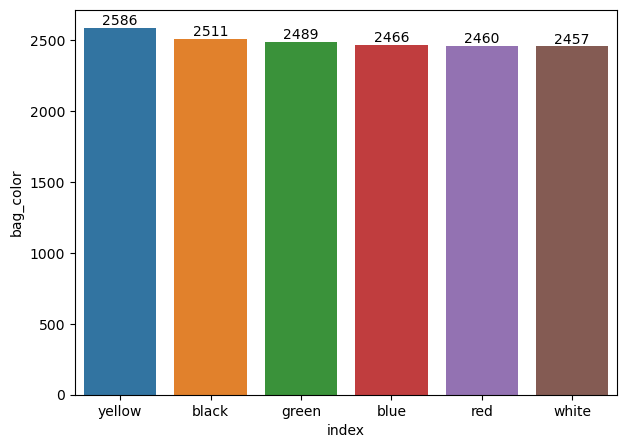

In [36]:
bag_color_plot = df['bag_color'].value_counts().reset_index()

plt.figure(figsize=(7, 5))
ax = sns.barplot(bag_color_plot, x='index', y='bag_color')

for i in ax.containers:
    ax.bar_label(i,)

plt.savefig(r'plot/bag_color_dist.jpeg')

Most students took public and private transport.
The data is also well distributed with least student travel by walk.

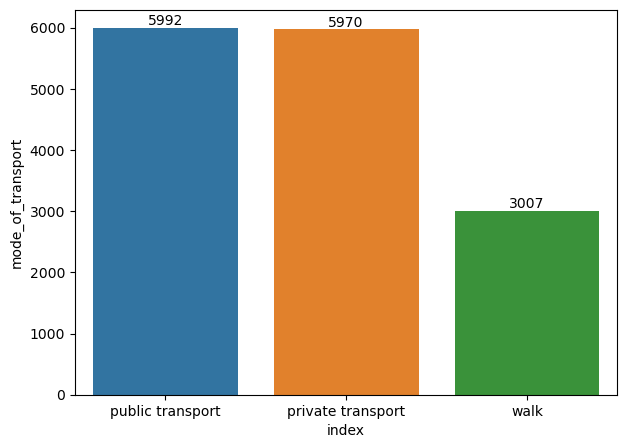

In [37]:
mode_of_transport_plot = df['mode_of_transport'].value_counts().reset_index()

plt.figure(figsize=(7, 5))
ax = sns.barplot(mode_of_transport_plot, x='index', y='mode_of_transport')

for i in ax.containers:
    ax.bar_label(i,)

plt.savefig(r'plot/transport_mode_dist.jpeg')

I think bag_color is not a meaningful feature as it has nothing to do with student getting good score. 
student_id is also not a meaningful feature as each student has unique student_id. This also applies to index.
Drop these features.

In [38]:
df.drop(['index', 'bag_color', 'student_id'], axis=1, inplace=True)

Let's check if there are colinearity between the features.
Transform the categorical variables.

In [45]:
categorical_variables = ['direct_admission', 'CCA', 'learning_style', 'tuition', 'gender', 'mode_of_transport']
numerical_variables = ['number_of_siblings', 'n_male', 'n_female', 'age', 'hours_per_week', 'attendance_rate', 'sleep_hours']
target_variable = 'final_test'

In [46]:
df_cat = pd.get_dummies(df[categorical_variables], drop_first=True)

Observations based on students' correlations:
1. Most students' final_test has a positive low correlation with attendance_rate, sleep_hours, CCA_NONE, learning_style_visual and tuition_yes and negative low correlation with n_siblings,
2. Most students with more male friends have less female friends and vice versa,
3. Most students have more friends with same sex (Male has more male friends and vice versa),

From the correlation matrix, attendance_rate is highly correlated with sleep_hours (0.87). Thus, we only use one of these features in our ML modelling later. Let's drop attendance_rate and use sleep_hours instead as attendance_rate has some imputes data previously.

In [47]:
X = pd.concat([df.drop(categorical_variables, axis=1), df_cat], axis=1)
y = df[target_variable]

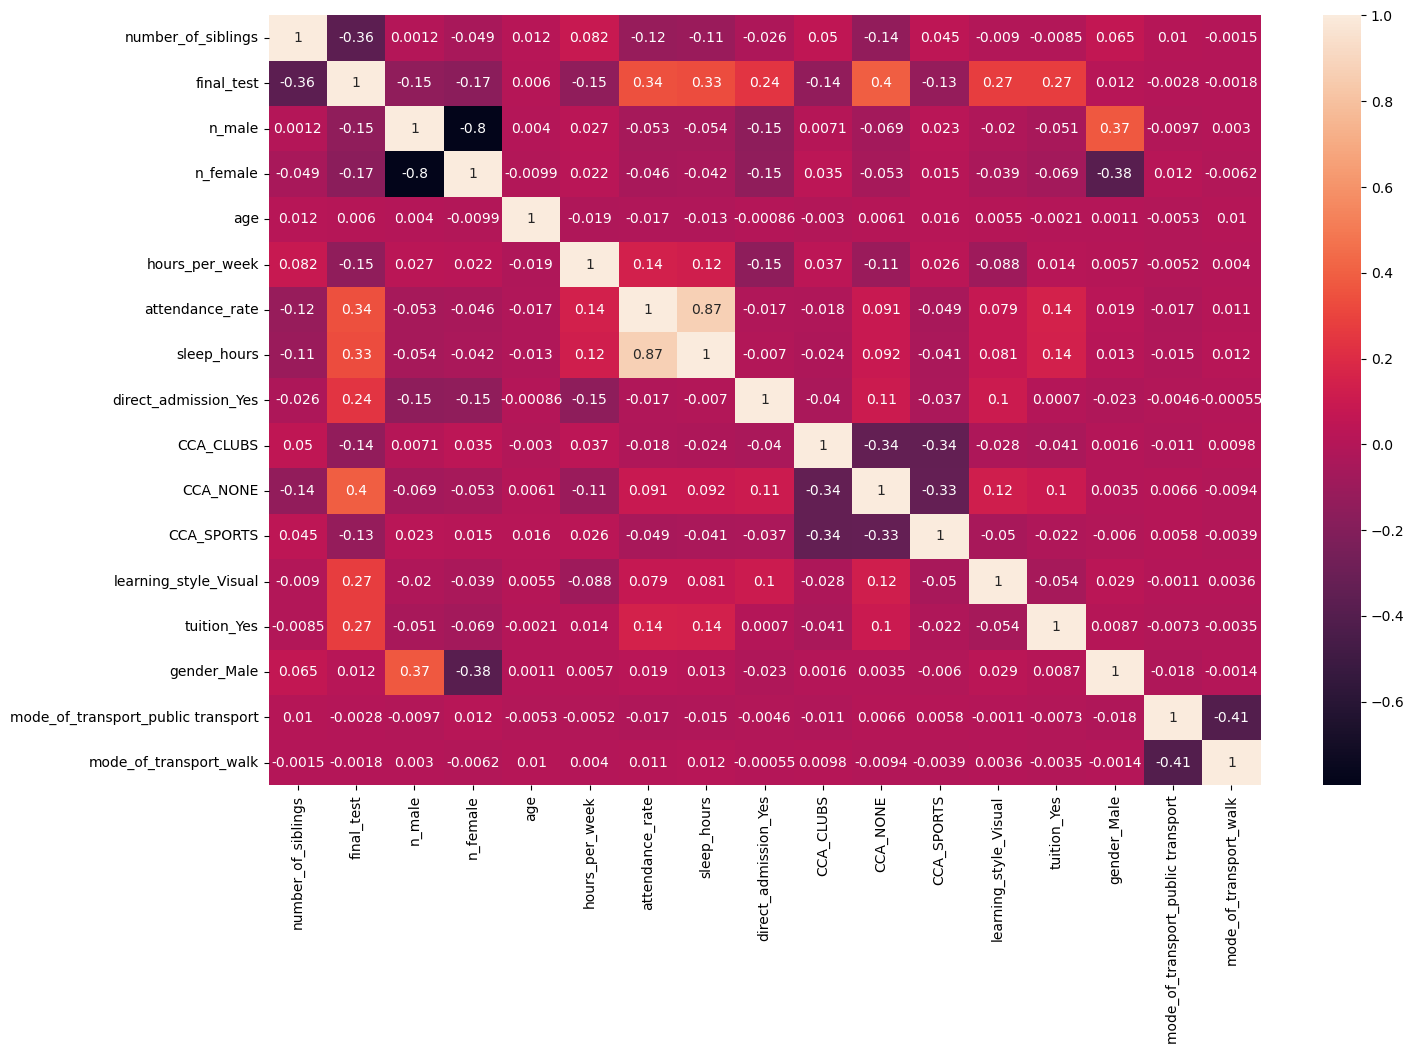

In [48]:
plt.figure(figsize=(16, 10))
sns.heatmap(X.corr(), annot=True)

plt.savefig(r'plot/colinearity_matrix.jpeg')

In [49]:
df.drop('attendance_rate', axis=1, inplace=True)

## Conclusion

In this EDA notebook, these are the following observations and insights derived and actions taken:
1. The data has ~3% missing data for final_test. As final_test is our target data of interest and we would like to make this prediction. ~3% is a small amount of missing data. Thus, we drop this data for training our model and we still have ~15k data entries to train and evaluate our ML model.
2. Features such as index and student_id are dropped as the data entries are too granular. bag_color is dropped as it is not meaningful or linked to your test score. wake_time and sleep_time are not meaningful as well so sleeping_hours was derived instead based on wake_time and sleep_time as the no of sleeping hours will dictate if the students have sufficient rest. People with sufficient rest should have better focus.
3. Government dictates that students must have at least 15 year old before he/she can sit in for O'level test. Drop the students with age less than 15 year old as it means wrong input data.
4. The final test distribution is normal distributed.
5. attendance_rate and sleeping_hours are highly correlated (r > 0.8). Thus, attendance_rate feature is dropped to avoid multicolinearity problems in the model. attendance_rate is chosen as feature to drop as it has missing data.
6. Final test score correlates positively with attendance_rate, sleep_hours, CCA_NONE, learning_style_visual and tuition_yes and negative low correlation with n_siblings. It seems like we need to let the students attend classess regularly, have sufficient rest, no CCA, learns by visual and have tuition to get them have better score.
7. One interesting finding is that final_test does not correlate positively with hours_per_week so it seems like students' score do not necessarily improve when they put in more hours.